In [1]:
import numpy as np
import matplotlib.pyplot as plt
from rateLib import rateNeuronSimulator
from inputLib import genRandomImg

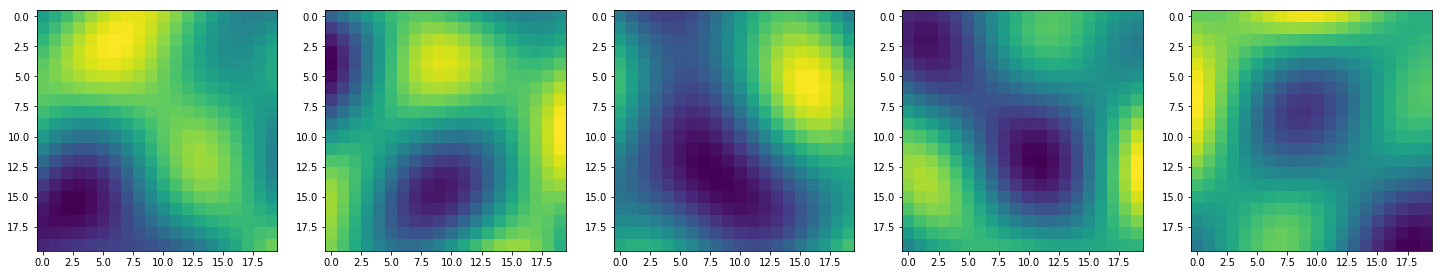

In [2]:
N_IMAGES = 5
IMG_SHAPE = (20, 20)

images = [genRandomImg(*IMG_SHAPE) for i in range(N_IMAGES)]

fig, ax = plt.subplots(ncols=N_IMAGES, figsize=(5*N_IMAGES, 5))
for i in range(N_IMAGES):
    ax[i].imshow(images[i])
plt.show()

In [3]:
param = {
    "DT"               : 0.1,
    "TAU_X"            : 5,
    "TAU_W"            : 100,
    "STORE_POP"        : True,
    "STORE_SYN"        : False,
    "STORE_SYN_NORM"   : True
}

RNS = rateNeuronSimulator(param)

# Define input populations
N_INP0 = np.prod(IMG_SHAPE)
T_INP_SWAP = 500 # ms, how frequently to swap images
inpidx0 = lambda T: int(T / T_INP_SWAP) % N_IMAGES
finp0 = lambda T : images[inpidx0(T)].flatten()

# Add populations
N_X1 = 5
RNS.add_input("Inp0", N_INP0, finp0)    
RNS.add_population("Err0", "EXC", "LRN", N_INP0)
RNS.add_population("X1",   "EXC", "PSRN", N_X1)
RNS.add_population("I1",   "INH", "PLRN", N_X1)

RNS.add_synapse("S1", "Inp0", "Err0", "id",    None)
RNS.add_synapse("S2", "X1",   "I1",   "id",    None)
RNS.add_synapse("S3", "I1",   "Err0", "dense", "Hebb")
RNS.add_synapse("S4", "Err0", "X1",   "dense", "Hebb")
    
RNS.construct()
RNS.print_summary()

Input Populations:
    0 Inp0 400
Populations:
    0 Err0 400 EXC LRN
    1 X1 5 EXC PSRN
    2 I1 5 INH PLRN
Synapses:
    0 S1 ('Inp0', 'Err0') id None
    1 S2 ('X1', 'I1') id None
    2 S3 ('I1', 'Err0') dense Hebb
    3 S4 ('Err0', 'X1') dense Hebb


In [4]:
T_RUN = 10000 # ms
RNS.run(T_RUN)

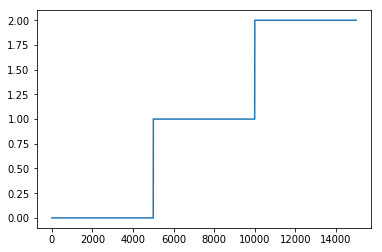

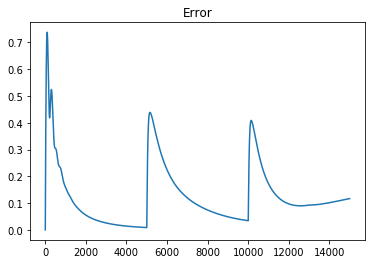

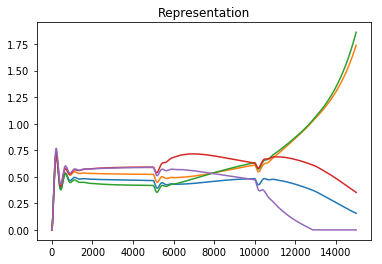

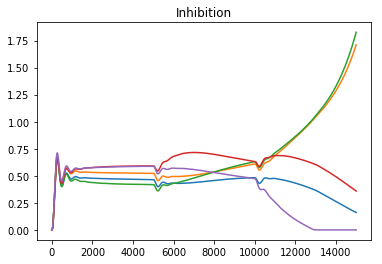

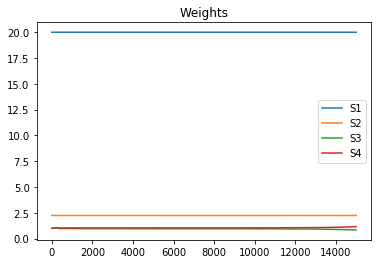

In [8]:
NRANGE = int(1500 / param['DT'])

# Plot input
plt.figure()
plt.plot([inpidx0(t) for t in np.arange(0, T_RUN, param['DT'])][:NRANGE])
plt.show()

# Plot error
plt.figure()
plt.title("Error")
plt.plot(np.linalg.norm(np.array(RNS.results['Err0'])[:NRANGE], axis=1))
plt.show()

# Plot representation
plt.figure()
plt.title("Representation")
plt.plot(RNS.results['X1'][:NRANGE])
plt.show()

# Plot Inhibition
plt.figure()
plt.title("Inhibition")
plt.plot(RNS.results['I1'][:NRANGE])
plt.show()

# Plot synaptic weights
plt.figure()
plt.title("Weights")
for sname in RNS.sname2idx.keys():
    plt.plot(RNS.results[sname+'_norm'][:NRANGE], label=sname)
plt.legend()
plt.show()